In [2]:
# Importing Dependencies
import pandas as pd 
import numpy as np 
import scipy as sc
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [164]:
# Importing the data from csv 
df = pd.read_csv('insurance.csv')
df.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [165]:
# Shape of the dataset 
print('The dataset has {a} records and {b} features'.format(a = df.shape[0], b = df.shape[1]))

The dataset has 1338 records and 8 features


In [166]:
# Describing the dataset 
df.describe().T.drop('index')

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [167]:
# Looking at data types and missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


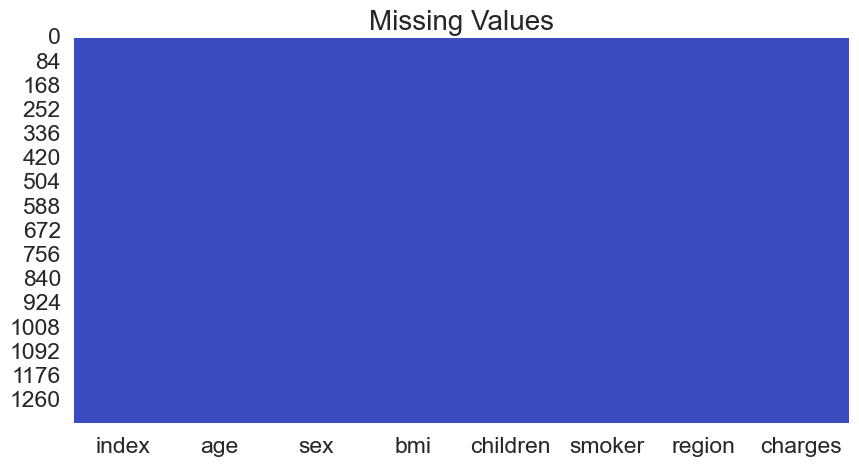

In [168]:
# Missing values 
g = sns.heatmap(df.isnull(), cmap='coolwarm', cbar=False).set_title('Missing Values', fontdict = {'fontsize':20})

In [169]:
# Number of unqiue values in categorical features
print('Number of Unique of Values:')
for column in df.select_dtypes('object'):
    print(f'{column} has {len(df[column].unique())}')

Number of Unique of Values:
sex has 2
smoker has 2
region has 4


### Data Exploratory

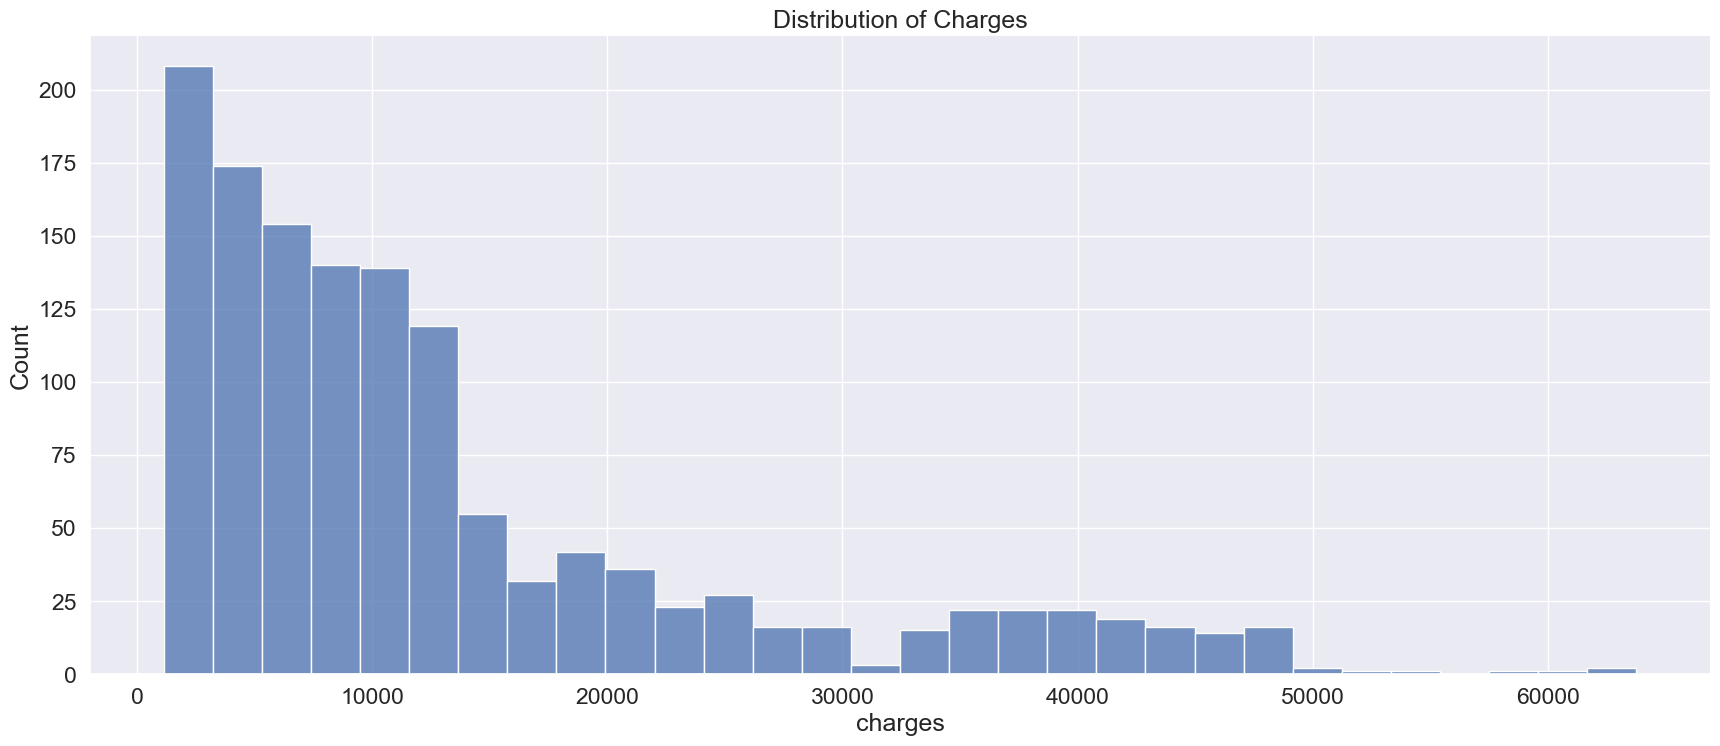

In [170]:
# Distribution of Charges 
sns.displot(df['charges'], height=10, aspect=2).set(title = 'Distribution of Charges')
plt.show()

In [171]:
# looking at the average charges for smokers and non-smokers 
smoker = round(df[df['smoker'] == 'yes']['charges'].mean(),2)
non_smoker = round(df[df['smoker'] == 'no']['charges'].mean(),2)

print(f'The mean charges for smokers is {smoker}')
print(f'The mean charges for non-smokers is {non_smoker}')

The mean charges for smokers is 32050.23
The mean charges for non-smokers is 8434.27


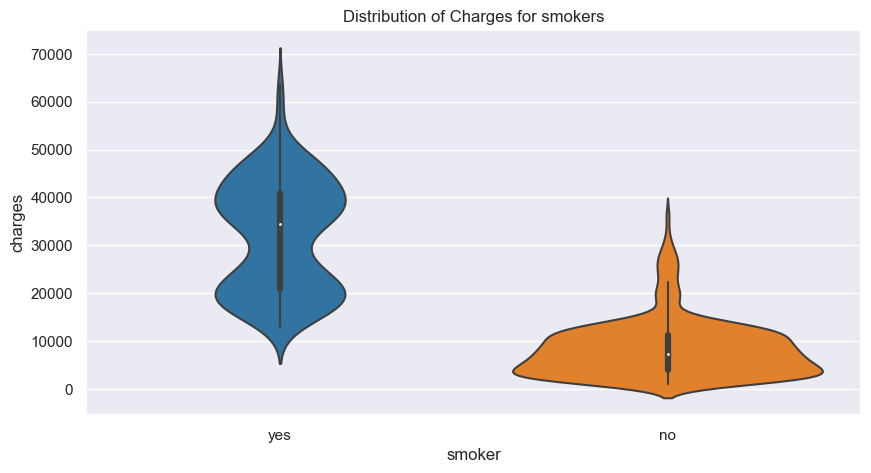

In [172]:
# Distribution of charges for smoker 
sns.set(font_scale = 1, rc={"figure.figsize":(10,5)})
sns.violinplot(y = df['charges'], x = df['smoker'], palette = 'tab10', dodge=True).set(
    title = 'Distribution of Charges for smokers')
plt.show()

import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

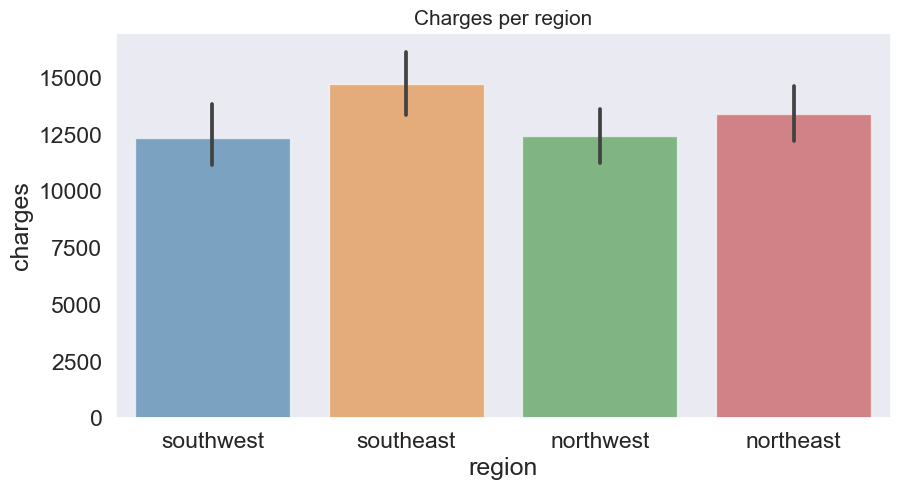

In [173]:
# Charges per region 
sns.set(font_scale = 1.5, rc={"figure.figsize":(10,5)}, style = 'dark')
sns.barplot(data = df, x = 'region', y = 'charges', palette='tab10', alpha = 0.6).set_title('Charges per region', 
                                                                                      fontdict = {'fontsize':15})
plt.show()

In [174]:
# Top ten ages with highest Charges
dum_dat = pd.DataFrame(df.groupby(by='age').mean()['charges'].sort_values(ascending = True))
dum_dat.tail(10)

,charges
age,
37,18019.911877
52,18256.269719
54,18758.546475
59,18895.869532
62,19163.856573
43,19267.278653
63,19884.998461
60,21979.418507
61,22024.457609


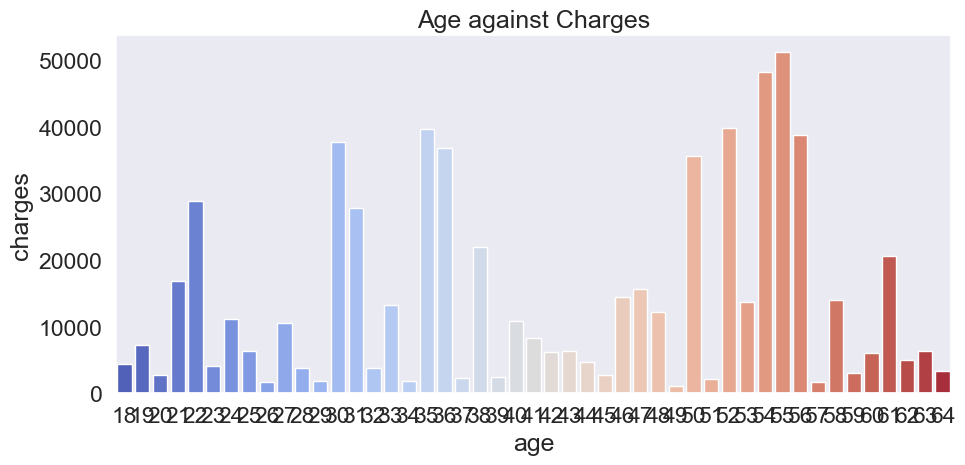

In [175]:
# Visualising relationship between age and charges 
dum_data = dum_dat.reset_index()
sns.barplot(x = dum_data['age'], y = df['charges'], palette='coolwarm').set(title = 'Age against Charges')
plt.tight_layout()
plt.show() 

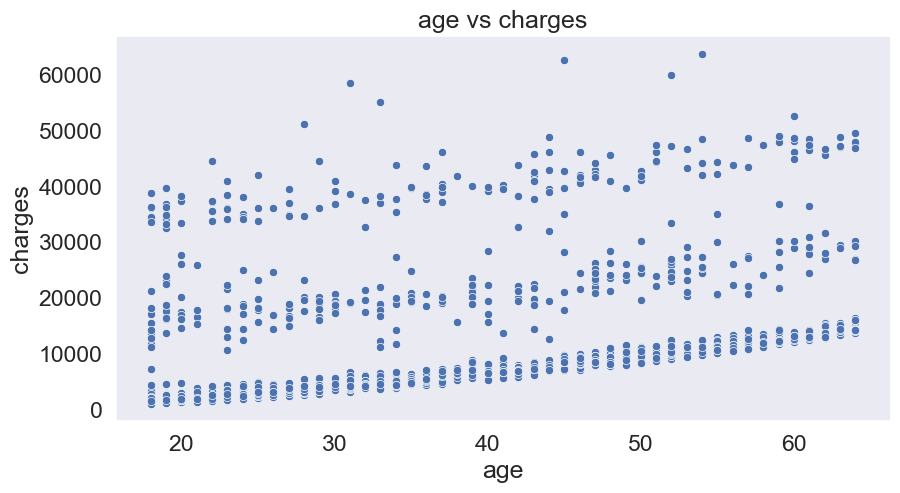

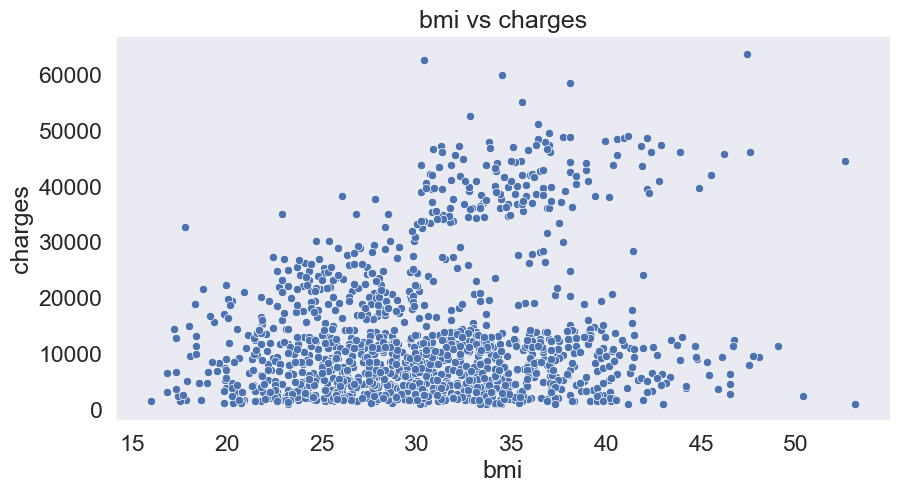

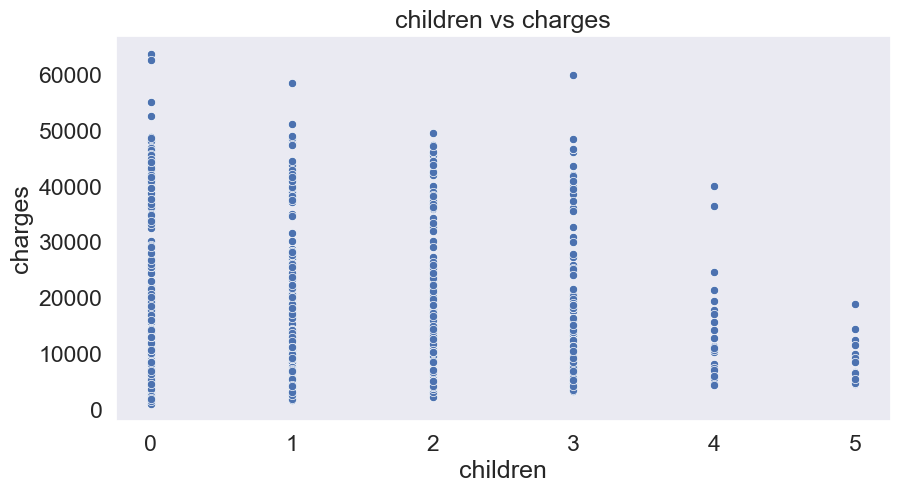

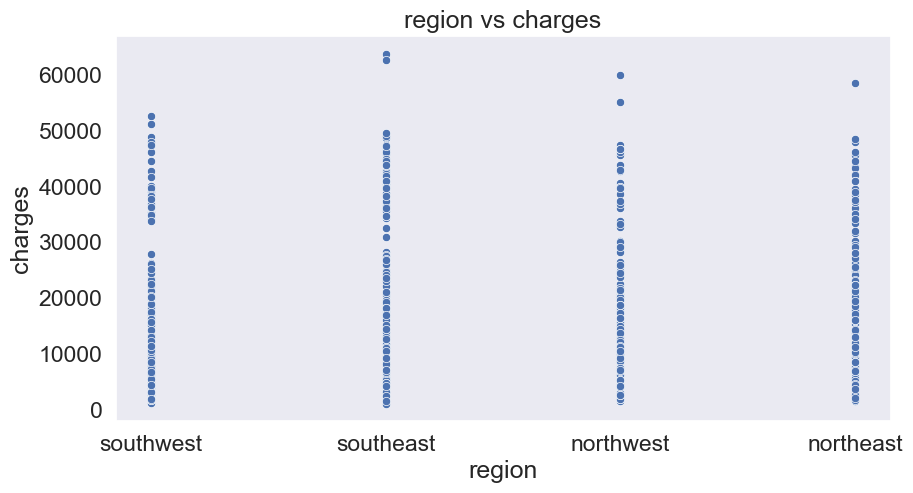

In [176]:
# Relationship between Charges and non-binary features

cols = [columns for columns in df.columns if len(df[columns].unique()) > 2]

if 'charges' and 'index' in cols: 
    cols.remove('charges')
    cols.remove('index')

for feature in cols:
    plt.figure(figsize = (10,5))
    sns.scatterplot(data = df, x = feature, y = 'charges')
    plt.title(f'{feature} vs charges')
    plt.show()


Text(0.5, 1.0, 'Correlation of features')

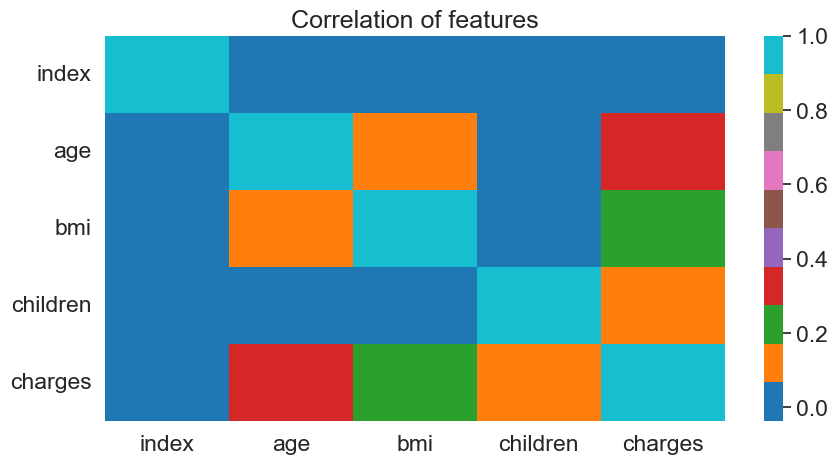

In [177]:
# Correlation Analysis
sns.heatmap(df.corr(), cmap='tab10').set_title('Correlation of features')

### Data Preprocessing

In [178]:
df

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1333,50,male,30.970,3,no,northwest,10600.54830
1334,1334,18,female,31.920,0,no,northeast,2205.98080
1335,1335,18,female,36.850,0,no,southeast,1629.83350
1336,1336,21,female,25.800,0,no,southwest,2007.94500


In [179]:
# Min Max scaling numerical features 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

if 'index' in df.columns: 
    df.drop('index', axis = 1, inplace = True)
    
cat_lst = []
for column in df.select_dtypes('object'):
    cat_lst.append(column)
    
cat_lst.append('charges')
df_num = df.drop(cat_lst, axis=1)
scaled = pd.DataFrame(scaler.fit_transform(df_num))

df = pd.concat([scaled, df], axis = 1)
df.drop(df_num, axis = 1, inplace = True)

In [180]:
df = df.rename({0: 'age', 1: 'bmi', 2: 'children'}, axis = 1)

In [181]:
# Encoding Categorical variables 
# Determining unique values in each cateogorical feature
for column in df.select_dtypes('object'): 
    print(f'{column} has the following unique values: {df[column].unique()}')

sex has the following unique values: ['female' 'male']
smoker has the following unique values: ['yes' 'no']
region has the following unique values: ['southwest' 'southeast' 'northwest' 'northeast']


In [182]:
# Encoding the categorical variables 
df_dummies = pd.DataFrame()
    
for columns in df.select_dtypes('object'): 
    add = pd.get_dummies(df[columns], drop_first=True)
    df_dummies = pd.concat([df_dummies, add], axis =1)
    
df = pd.concat([df, df_dummies], axis = 1)    

for columns in df.select_dtypes('object'):
    df.drop(columns, axis = 1, inplace=True)

df.head()

,age,bmi,children,charges,male,yes,northwest,southeast,southwest
0,0.021739,0.321227,0.0,16884.92400,0,1,0,0,1
1,0.000000,0.479150,0.2,1725.55230,1,0,0,1,0
2,0.217391,0.458434,0.6,4449.46200,1,0,0,1,0
3,0.326087,0.181464,0.0,21984.47061,1,0,1,0,0
4,0.304348,0.347592,0.0,3866.85520,1,0,1,0,0


 ### Modelling

In [183]:
# Random Forest 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Creating feature and target object 
X = df.drop('charges', axis = 1).values
y = df[['charges']].values

In [184]:
# Splitting into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=101, shuffle = True)

In [185]:
# Choosing scoring method 
#from sklearn import metrics
#metrics.get_scorer_names()

In [186]:
# Fitting the model using Grid Search 
params = {'n_estimators' : [100, 150, 200],  
          'max_depth' : [30, 50, 70]}

RandomForest = RandomForestRegressor()

model = GridSearchCV(RandomForest, param_grid=params, scoring='neg_mean_squared_error', cv = 3)
model.fit(X_train, Y_train)

C:\Users\jacks\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jacks\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jacks\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jacks\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [30, 50, 70],
                         'n_estimators': [100, 150, 200]},
             scoring='neg_mean_squared_error')

In [187]:
# Model Summary / Make Predictions 
new_model = model.best_estimator_
predictions = new_model.predict(X_test)

In [188]:
# Evaluation Metrics 
from sklearn.metrics import explained_variance_score, mean_squared_error

print(f'The mean squared is {round(mean_squared_error(Y_test, predictions),2)}')
print('The explained variance of the predictors is {}%'.format(round(explained_variance_score(Y_test, predictions)*100,2)))

The mean squared is 25422911.52
The explained variance of the predictors is 82.01%


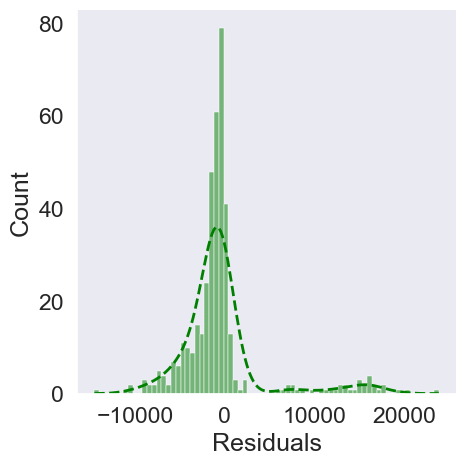

In [189]:
# Checking the distribution of the model errors (residuals) 
df_evaluate = pd.concat([pd.DataFrame(Y_test, columns=['Actual']), pd.DataFrame(predictions, columns=['Predicted'])], axis = 1)
df_evaluate
residuals = df_evaluate['Actual'] - df_evaluate['Predicted']
df_evaluate = pd.concat([df_evaluate, residuals], axis = 1)
df_evaluate = df_evaluate.rename({0:'Residuals'}, axis = 1)

sns.displot(df_evaluate['Residuals'], kde = True, line_kws = {'color': 'crimson', 'lw': 2, 'ls': '--'}, color='green')
plt.show()

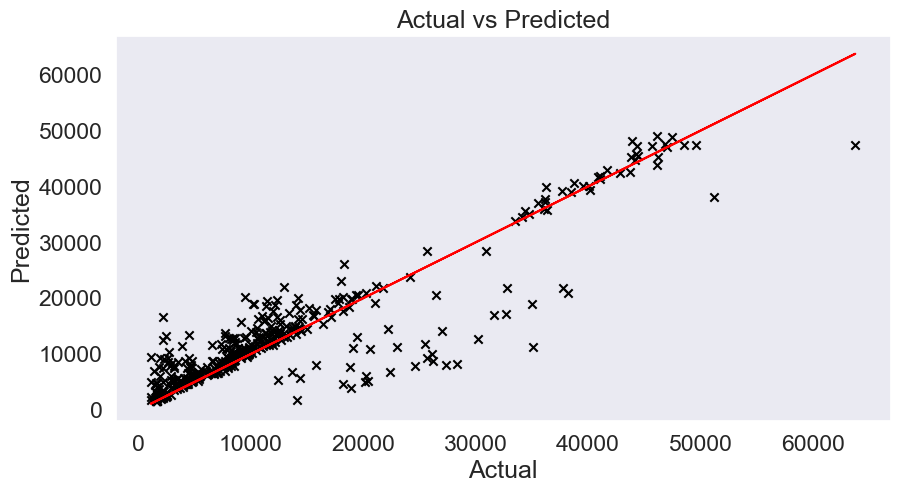

In [190]:
# Plotting actual and predicted
plt.figure(figsize = (10,5))
g = plt.scatter(x = df_evaluate['Actual'],  y = df_evaluate['Predicted'], marker='x')
g.set_color('black')
plt.plot(df_evaluate['Actual'], df_evaluate['Actual'], 'red')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### Modelling other algorithms

In [191]:
# Fitting other models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
model = {
'Linear Regression': LinearRegression(),
'Ridge Regression (L2)': Ridge(),
'KNearest Neighbors Regressor': KNeighborsRegressor(),
'Support Vector Machine (RBF Kernel)': SVR(),
'Decission Tree': DecisionTreeRegressor(),
'Neural Network': MLPRegressor(max_iter=10000),
'Random Forest': RandomForestRegressor(),
'Gradient Boosting Regressor': GradientBoostingRegressor(),
'Adaboost': AdaBoostRegressor(),    
}

lst = []
lst_name = []

for name, model in model.items():
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)
        lst.append(mean_squared_error(predictions, Y_test))
        lst_name.append(name)
        

evalu_table = pd.DataFrame(lst).T      
evalu_table.columns = [lst_name]

C:\Users\jacks\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jacks\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jacks\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jacks\AppData\Local\Temp\ipykernel_28784\1649775616.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using

In [193]:
# Analyse performance of other models 
evalu_table.T.rename({0:'mse'}, axis = 1).sort_values(by = 'mse', ascending = True)

,mse
Gradient Boosting Regressor,2.115380e+07
Random Forest,2.533569e+07
Adaboost,2.795109e+07
Neural Network,3.131319e+07
Linear Regression,3.368366e+07
Ridge Regression (L2),3.371563e+07
KNearest Neighbors Regressor,3.413588e+07
Decission Tree,5.070973e+07
Support Vector Machine (RBF Kernel),1.514675e+08


### The Gradient Boosting Regressor had the lowest mean squared error and thus is the optimal model